**Problem-1**
Load the Dataset: • Read the dataset into a pandas DataFrame. • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#problem1
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt

# 1. Load the Dataset

df = pd.read_csv("/content/drive/MyDrive/Concept of technology /diabetes.csv")

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Exploratory Data Analysis
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

# 2. Handle Missing Data

if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("\nMissing value is handled.")

# 3. Feature Engineering

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Perform a train-test split
def train_test_split(X, y, test_size=0.3):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_split = int(len(X) * (1 - test_size))
    X_train, X_test = X[indices[:test_split]], X[indices[test_split:]]
    y_train, y_test = y[indices[:test_split]], y[indices[test_split:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Implement KNN from Scratch
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.bincount(k_nearest_labels).argmax()

# Initialize and evaluate the KNN model
knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"\nAccuracy (Original Data): {accuracy:.2f}")

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age    

Problem - 2 - Experimentation:

Repeat the Classification Task: • Scale the Feature matrix X. • Use the scaled data for training and testing the kNN Classifier. • Record the results.
Comparative Analysis: Compare the Results - • Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset. • Discuss: – How scaling impacted the KNN performance. – The reason for any observed changes in accuracy.

In [11]:
#1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
df = pd.read_csv("/content/drive/MyDrive/Concept of technology /diabetes.csv")

# Assuming X and y are already defined from the previous cell

# Scale the data
x_min = X.min(axis=0)
x_max = X.max(axis=0)
X_scaled = (X - x_min) / (x_max - x_min)

# Train-test split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y)

# Original data
knn_original = KNN(k=3)
knn_original.fit(X_train, y_train)
predictions_original = knn_original.predict(X_test)
accuracy_original = np.mean(predictions_original == y_test)

# Scaled data
knn_scaled = StandardScaler()
knn_scaled.fit(X_train_scaled)
X_test_scaled = knn_scaled.transform(X_test_scaled)
X_train_scaled = knn_scaled.transform(X_train_scaled)

knn_classifier = KNN(k=3)
knn_classifier.fit(X_train_scaled, y_train_scaled)
predictions_scaled = knn_classifier.predict(X_test_scaled)
accuracy_scaled = np.mean(predictions_scaled == y_test_scaled)

# Results
print(f"Accuracy (Original Data): {accuracy_original:.2f}")
print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}")
print("\nClassification Report (Original Data):")
print(classification_report(y_test, predictions_original))
print("\nClassification Report (Scaled Data):")
print(classification_report(y_test_scaled, predictions_scaled))

Accuracy (Original Data): 0.70
Accuracy (Scaled Data): 0.70

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       152
           1       0.57      0.51      0.54        79

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.69      0.70      0.70       231


Classification Report (Scaled Data):
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       152
           1       0.58      0.43      0.49        79

    accuracy                           0.70       231
   macro avg       0.66      0.63      0.64       231
weighted avg       0.68      0.70      0.68       231



Problem - 3 - Experimentation with k:

Vary the number of neighbors - k: • Run the KNN model on both the original and scaled datasets for a range of:
k= 1, 2, 3, . . . 15

• For each k, record: – Accuracy. – Time taken to make predictions. 2. Visualize the Results: • Plot the following graphs: – k vs. Accuracy for original and scaled datasets. – k vs. Time Taken for original and scaled datasets. 3. Analyze and Discuss: • Discuss how the choice of k affects the accuracy and computational cost. • Identify the optimal k based on your analysis.

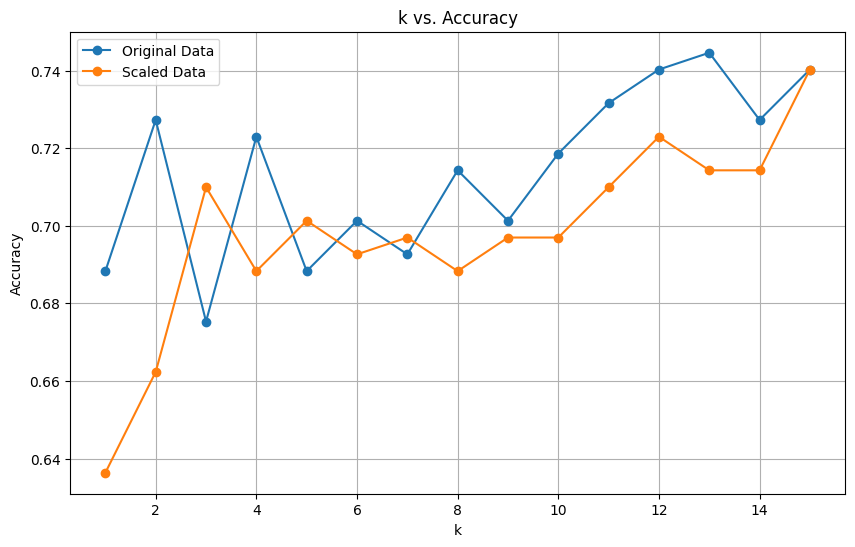

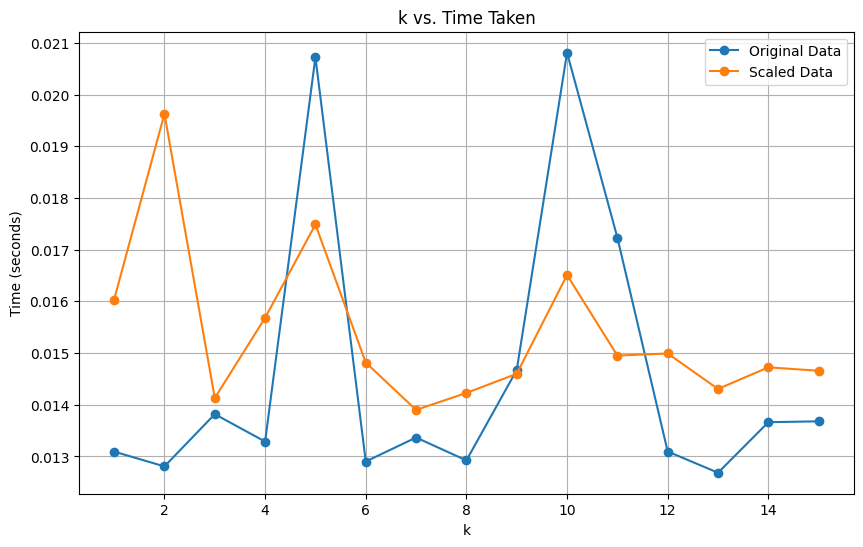

In [12]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/Concept of technology /diabetes.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

#fun exp for k=1 to 15
for k in k_values:
    start_time = time.time()
    knn_original = KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train, y_train)
    predictions_original = knn_original.predict(X_test)
    accuracy_original.append(accuracy_score(y_test, predictions_original))
    time_original.append(time.time() - start_time)

    start_time = time.time()
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    predictions_scaled = knn_scaled.predict(X_test_scaled)
    accuracy_scaled.append(accuracy_score(y_test, predictions_scaled))
    time_scaled.append(time.time() - start_time)

#plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_original, marker='o', label='Original Data')
plt.plot(k_values, accuracy_scaled, marker='o', label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#plot time taken vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, time_original, marker='o', label='Original Data')
plt.plot(k_values, time_scaled, marker='o', label='Scaled Data')
plt.title('k vs. Time Taken')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()